# Image Segmentation using KMeans

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

## Reading the image

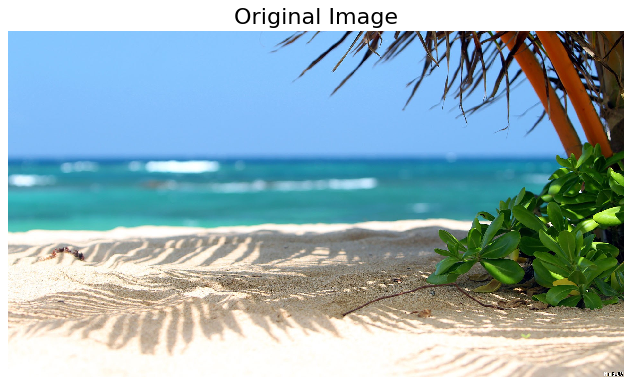

In [2]:
beach = imread('..\Data\Images\Beach.jpg')
plt.figure(figsize = (8, 6), dpi = 80)
plt.axis(False)
plt.title("Original Image", fontsize = 20)
imshow(beach);

## Converting Image array into a pandas DataFrame

In [3]:
def image_to_pandas(image):
    df = pd.DataFrame()
    df['R'] = pd.Series(image[:, :, 0].flatten())
    df['G'] = pd.Series(image[:, :, 1].flatten())
    df['B'] = pd.Series(image[:, :, 2].flatten())
    return df

df_beach = image_to_pandas(beach)
df_beach.head(5)

,R,G,B
0,131,198,253
1,131,198,253
2,131,198,253
3,131,198,253
4,131,198,253


## KMeans clustering on the image data

Wall time: 24 s


C:\Users\Mayur Garg\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


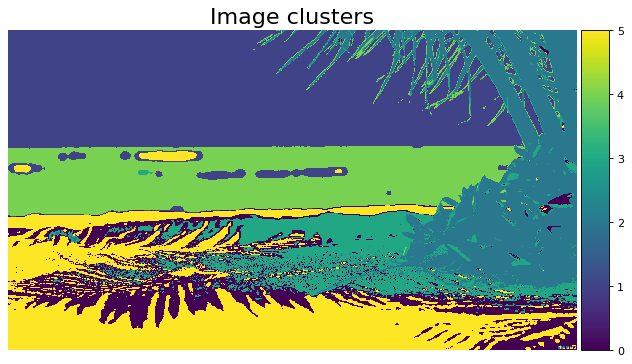

In [4]:
%%time

kmeans = KMeans(n_clusters = 6, random_state = 7).fit(df_beach)
result = kmeans.labels_.reshape(beach.shape[0], beach.shape[1])

plt.figure(figsize = (8, 6), dpi = 80)
plt.axis(False)
plt.title("Image clusters", fontsize = 20)
_ = imshow(result, cmap='viridis')

## Getting clusters as image masks

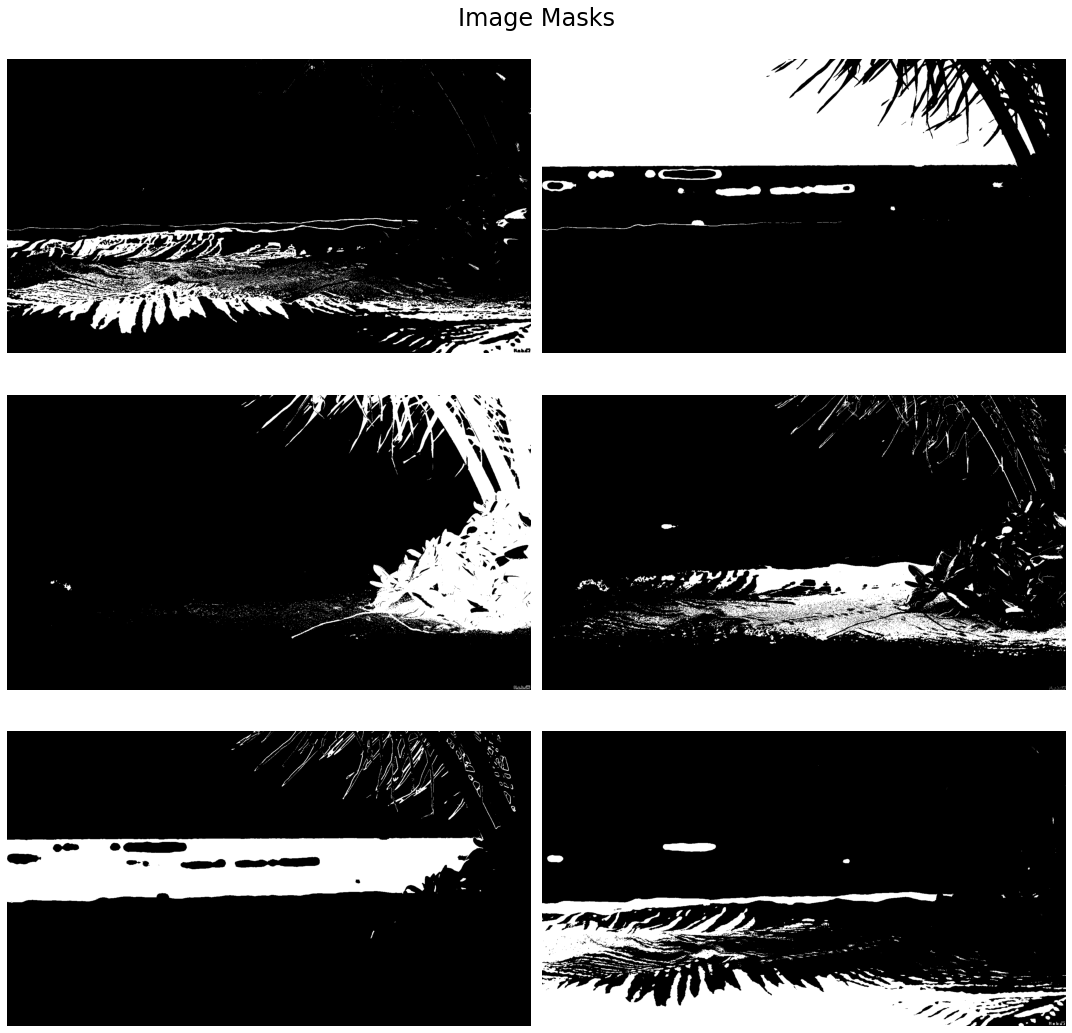

In [5]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

for n, ax in enumerate(axes.flatten()):
    ax.imshow(result == [n], cmap = 'gray');
    ax.set_axis_off()

plt.suptitle("Image Masks", fontsize = 24)
plt.tight_layout()
plt.show()

## Masking the original image to get segments

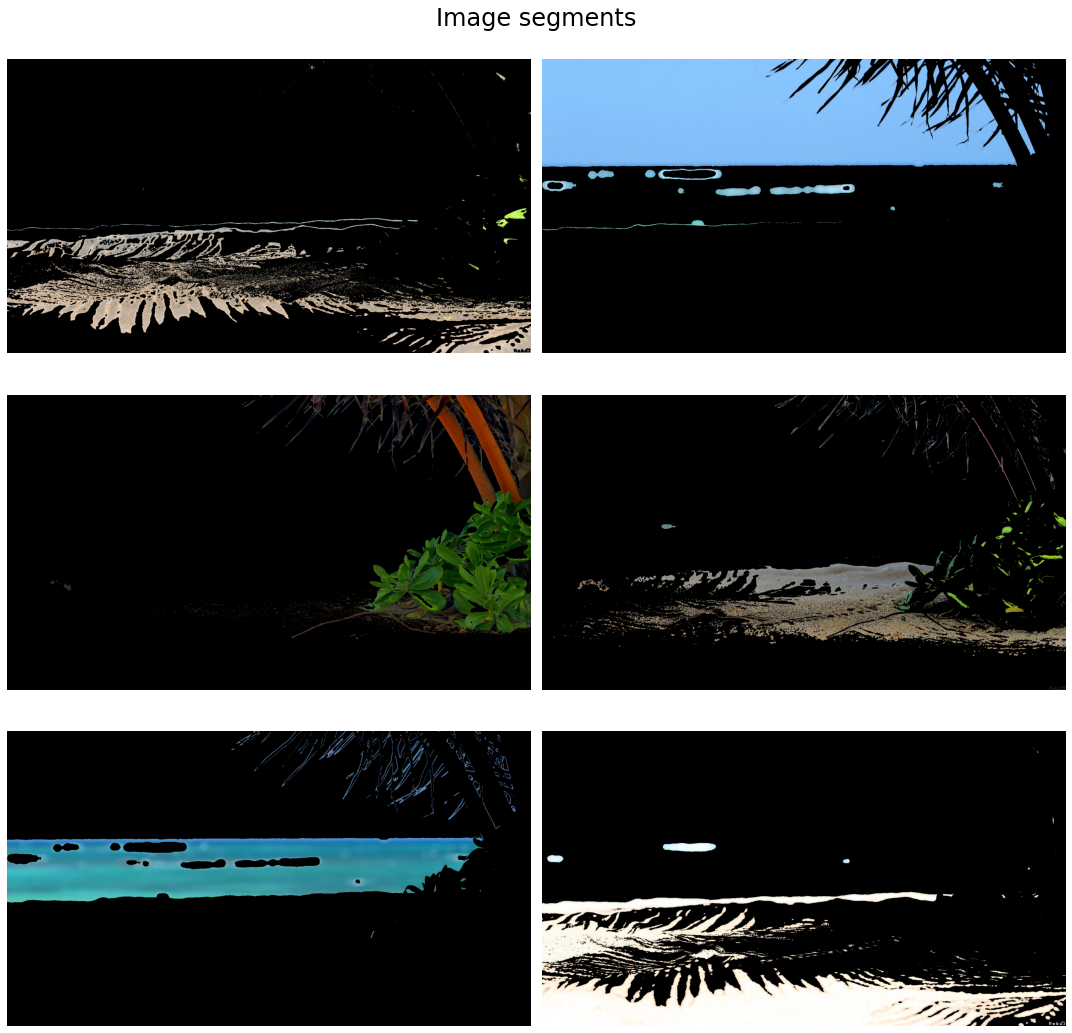

In [6]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

for n, ax in enumerate(axes.flatten()):
    mask = (result == [n]).reshape(*beach.shape[:2], 1)
    ax.imshow(beach * mask, cmap = 'gray');
    ax.set_axis_off()

plt.suptitle("Image segments", fontsize = 24)
plt.tight_layout()
plt.show()